In [145]:
import sys
import math
import warnings
warnings.filterwarnings('ignore')
sys.path.append('../../dataset/')
sys.path.append('../../network/')
sys.path.append('../../model/')
sys.path.append('../')

from utils import *
from main_loading import *
from main_network import *
from main_model_rec import *
from main_model_one_class import *
from gaussian3d_loader import *

In [2]:
from pathlib import Path
from mpl_toolkits.mplot3d import Axes3D

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.figure_format='retina'
%matplotlib notebook

# 1. Get Source Data

In [3]:
random_state = 42
normal_mu = [1, - 1, 1]
abnormal_mu = [1, 1, 1]
cov = [[0.1, 0, 0],
       [0, 0.1, 0],
       [0, 0, 0.1]]
split = 0.2
ratio_abnormal = 0.1

In [4]:
# Set random seed
np.random.seed(random_state)

# Generate X_normal
X_normal = np.random.multivariate_normal(normal_mu, cov, 6000)
y_normal = np.zeros(X_normal.shape[0])
        
# Generate X_abnormal
X_abnormal = np.random.multivariate_normal(abnormal_mu, cov, int(6000 * ratio_abnormal))
y_abnormal = np.ones(X_abnormal.shape[0])

# Concatenate
X = np.vstack((X_normal, X_abnormal))
y = np.hstack((y_normal, y_abnormal))

# Do train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=split,
                                                    random_state=random_state,
                                                    stratify=y)

In [5]:
X_train_normal = X_train[y_train == 0]
X_train_abnormal = X_train[y_train == 1]

# 2. Get Test Data

In [6]:
root = Path('../report')
root_oc = root / 'one_class' / 'one_class_[1_-1_1]_[1_1_1]_[0.1]_[60]'
root_rec = root / 'rec' / 'rec_[1_-1_1]_[1_1_1]_[0.1]_[60]'

oc_d0i = pd.read_pickle(root_oc / 'df_d0i.pkl')
oc_d1i = pd.read_pickle(root_oc / 'df_d1i.pkl')
rec_d0i = pd.read_pickle(root_rec / 'df_d0i.pkl')
rec_d1i = pd.read_pickle(root_rec / 'df_d1i.pkl')

In [40]:
oc_d0i

,d0i,d1i,recall,mu
0,0.797857,2.5,0.005000,"[0.9477721459070794, -1.363035787346584, 1.814..."
1,0.797857,2.5,0.000000,"[0.1857455931515376, -1.363035787346584, 0.944..."
2,2.675541,2.5,0.000000,"[-0.41452793176127223, -0.8936146945170809, 1...."
3,2.675541,2.5,0.053333,"[0.34749862099426954, -0.8936146945170809, -0...."
4,4.445306,2.5,0.018333,"[-1.0349554500507896, -0.45117355532045833, 0...."
5,4.445306,2.5,0.116667,"[0.9679261392837867, -0.45117355532045833, 3.0..."
6,5.598418,2.5,0.105000,"[-0.6307080762542079, -0.16289545142059048, -0..."
7,5.598418,2.5,0.013333,"[0.131318476501334, -0.16289545142059048, 3.03..."
8,7.368183,2.5,0.991667,"[0.7517459947908512, 0.2795456877760323, -1.38..."
9,7.368183,2.5,0.190000,"[-1.251135594543725, 0.2795456877760323, 1.814..."


In [9]:
oc_d0i.iloc[[10, 11]]

,d0i,d1i,recall,mu
10,8.480235,2.5,0.993333,"[0.37957248171048286, 0.5575588608033774, -1.3..."
11,8.480235,2.5,0.066667,"[-0.3824540710450588, 0.5575588608033774, 3.03..."


In [55]:
test_mu_1 = oc_d0i['mu'][10]
test_mu_2 = oc_d0i['mu'][11]

In [56]:
X_test_1 = np.random.multivariate_normal(test_mu_1, cov, 600)
X_test_2 = np.random.multivariate_normal(test_mu_2, cov, 600)

# 3. 3D Visualization

<IPython.core.display.Javascript object>


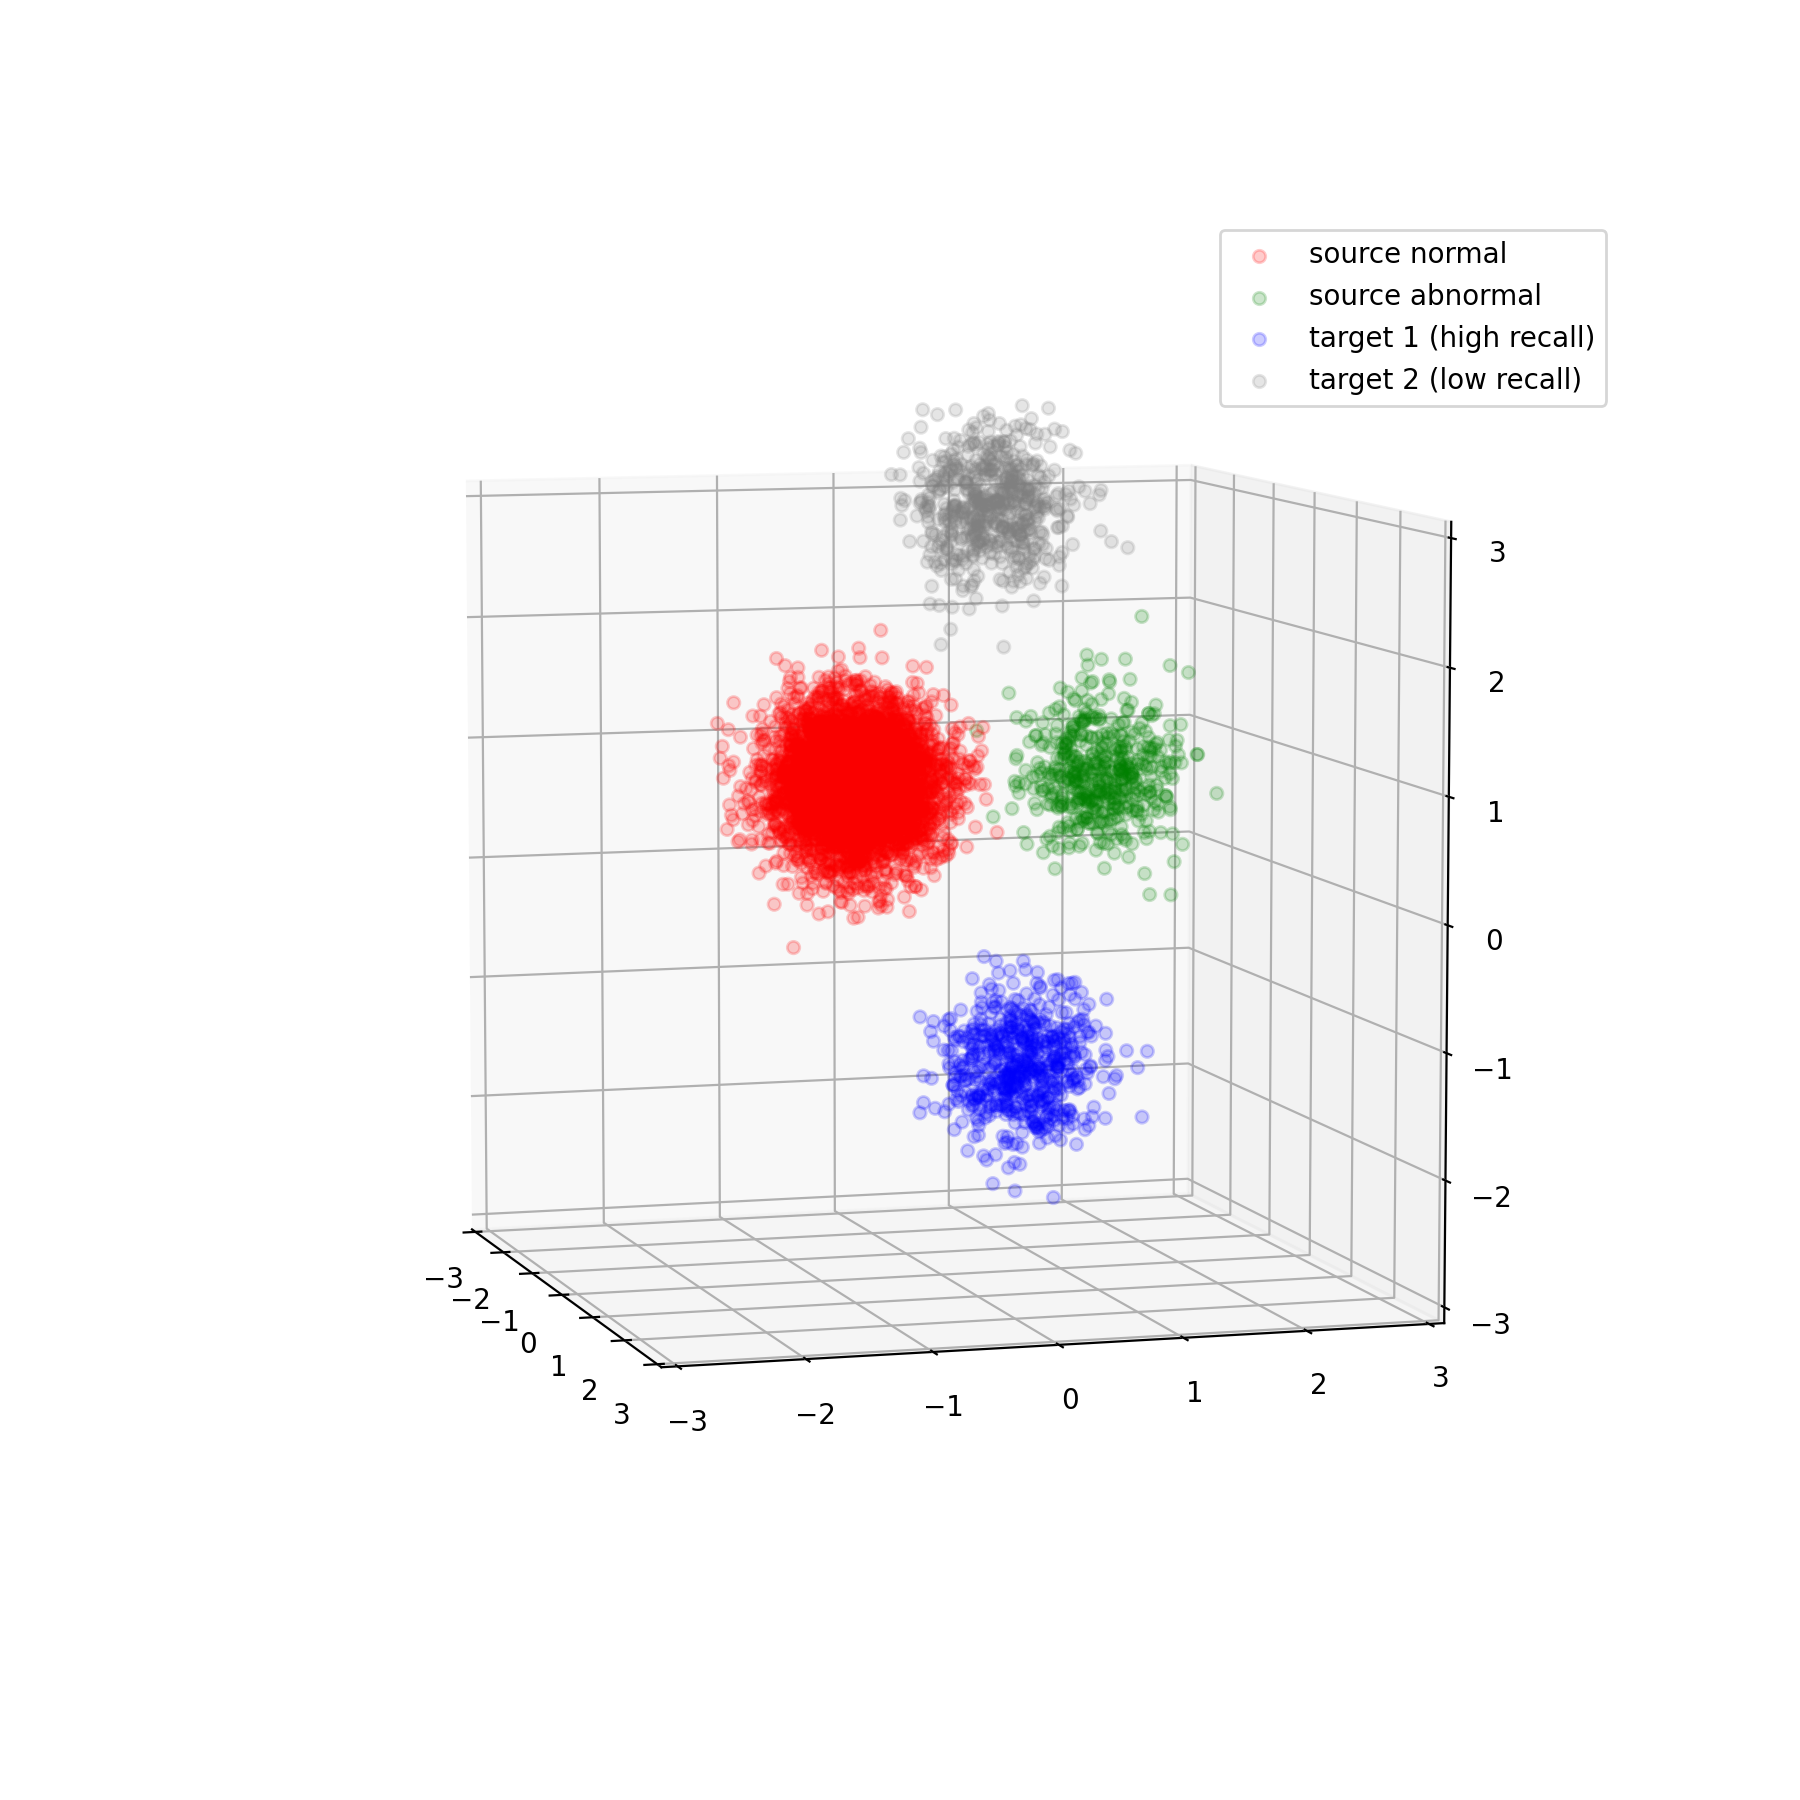

In [57]:
fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(*X_train_normal.T, color='red', alpha=0.2, label='source normal')
ax.scatter(*X_train_abnormal.T, color='green', alpha=0.2, label='source abnormal')
ax.scatter(*X_test_1.T, color='blue', alpha=0.2, label='target 1 (high recall)')
ax.scatter(*X_test_2.T, color='gray', alpha=0.2, label='target 2 (low recall)')
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.set_zlim(-3, 3)
plt.legend()

# 4. Get Latent Space

In [74]:
oc_model_path = root_oc / 'model.tar'
cut_path = root_oc / 'cut_90.npy'
loader_eval_name = 'gaussian3d_eval'
normal_mu_str = '1_-1_1'
abnormal_mu_str = '1_1_1'
ratio_abnormal = 0.1

In [121]:
class OneClassEncoder:
    def __init__(self):
        self.net = None
        self.net_name = None

    def set_network(self, net_name):
        self.net_name = net_name
        self.net = build_network(net_name)

    def load_model(self, model_path, map_location):
        model_dict = torch.load(model_path, map_location=map_location)
        self.c = model_dict['c']
        self.net.load_state_dict(model_dict['net_dict'])

    def get_latent(self, dataset, device, batch_size, n_jobs_dataloader):
        all_loader = dataset.loaders(batch_size=batch_size,
                                     num_workers=n_jobs_dataloader)
        net = self.net.to(device)
        net.eval()
        
        X_pred_list = []
        dist_list = []
        with torch.no_grad():
            for data in all_loader:
                X, y, idx = data
                X, y, idx = X.to(device), y.to(device), idx.to(device)
                X_pred = net(X)
                
                dist = torch.sum((X_pred - torch.tensor(self.c, device=device)) ** 2, dim=1)
                X_pred_list.extend(X_pred.numpy())
                dist_list.extend(dist.numpy())
        
        return np.array(X_pred_list), np.array(dist_list)

In [122]:
encoder = OneClassEncoder()
encoder.set_network('gaussian3d_one_class')
encoder.load_model(oc_model_path, map_location='cpu')

In [123]:
dataset_normal = load_dataset(loader_name=loader_eval_name,
                              abnormal_mu_test=[1, - 1, 1],
                              normal_mu_train=normal_mu_str,
                              abnormal_mu_train=abnormal_mu_str,
                              ratio_abnormal=ratio_abnormal,
                              num_examples=6000)

dataset_abnormal = load_dataset(loader_name=loader_eval_name,
                                abnormal_mu_test=[1, 1, 1],
                                normal_mu_train=normal_mu_str,
                                abnormal_mu_train=abnormal_mu_str,
                                ratio_abnormal=ratio_abnormal,
                                num_examples=600)

[1, -1, 1]
[1, 1, 1]


In [124]:
dataset_test_1 = load_dataset(loader_name=loader_eval_name,
                              abnormal_mu_test=test_mu_1,
                              normal_mu_train=normal_mu_str,
                              abnormal_mu_train=abnormal_mu_str,
                              ratio_abnormal=ratio_abnormal)

dataset_test_2 = load_dataset(loader_name=loader_eval_name,
                              abnormal_mu_test=test_mu_2,
                              normal_mu_train=normal_mu_str,
                              abnormal_mu_train=abnormal_mu_str,
                              ratio_abnormal=ratio_abnormal)

[0.37957248171048286, 0.5575588608033774, -1.3810324510378909]
[-0.3824540710450588, 0.5575588608033774, 3.0354524263164047]


In [125]:
latent_normal, score_normal = encoder.get_latent(dataset_normal, 'cpu', 6000, 0)
latent_abnormal, score_abnormal = encoder.get_latent(dataset_abnormal, 'cpu', 600, 0)
latent_test_1, score_test_1 = encoder.get_latent(dataset_test_1, 'cpu', 600, 0)
latent_test_2, score_test_2 = encoder.get_latent(dataset_test_2, 'cpu', 600, 0)

<IPython.core.display.Javascript object>


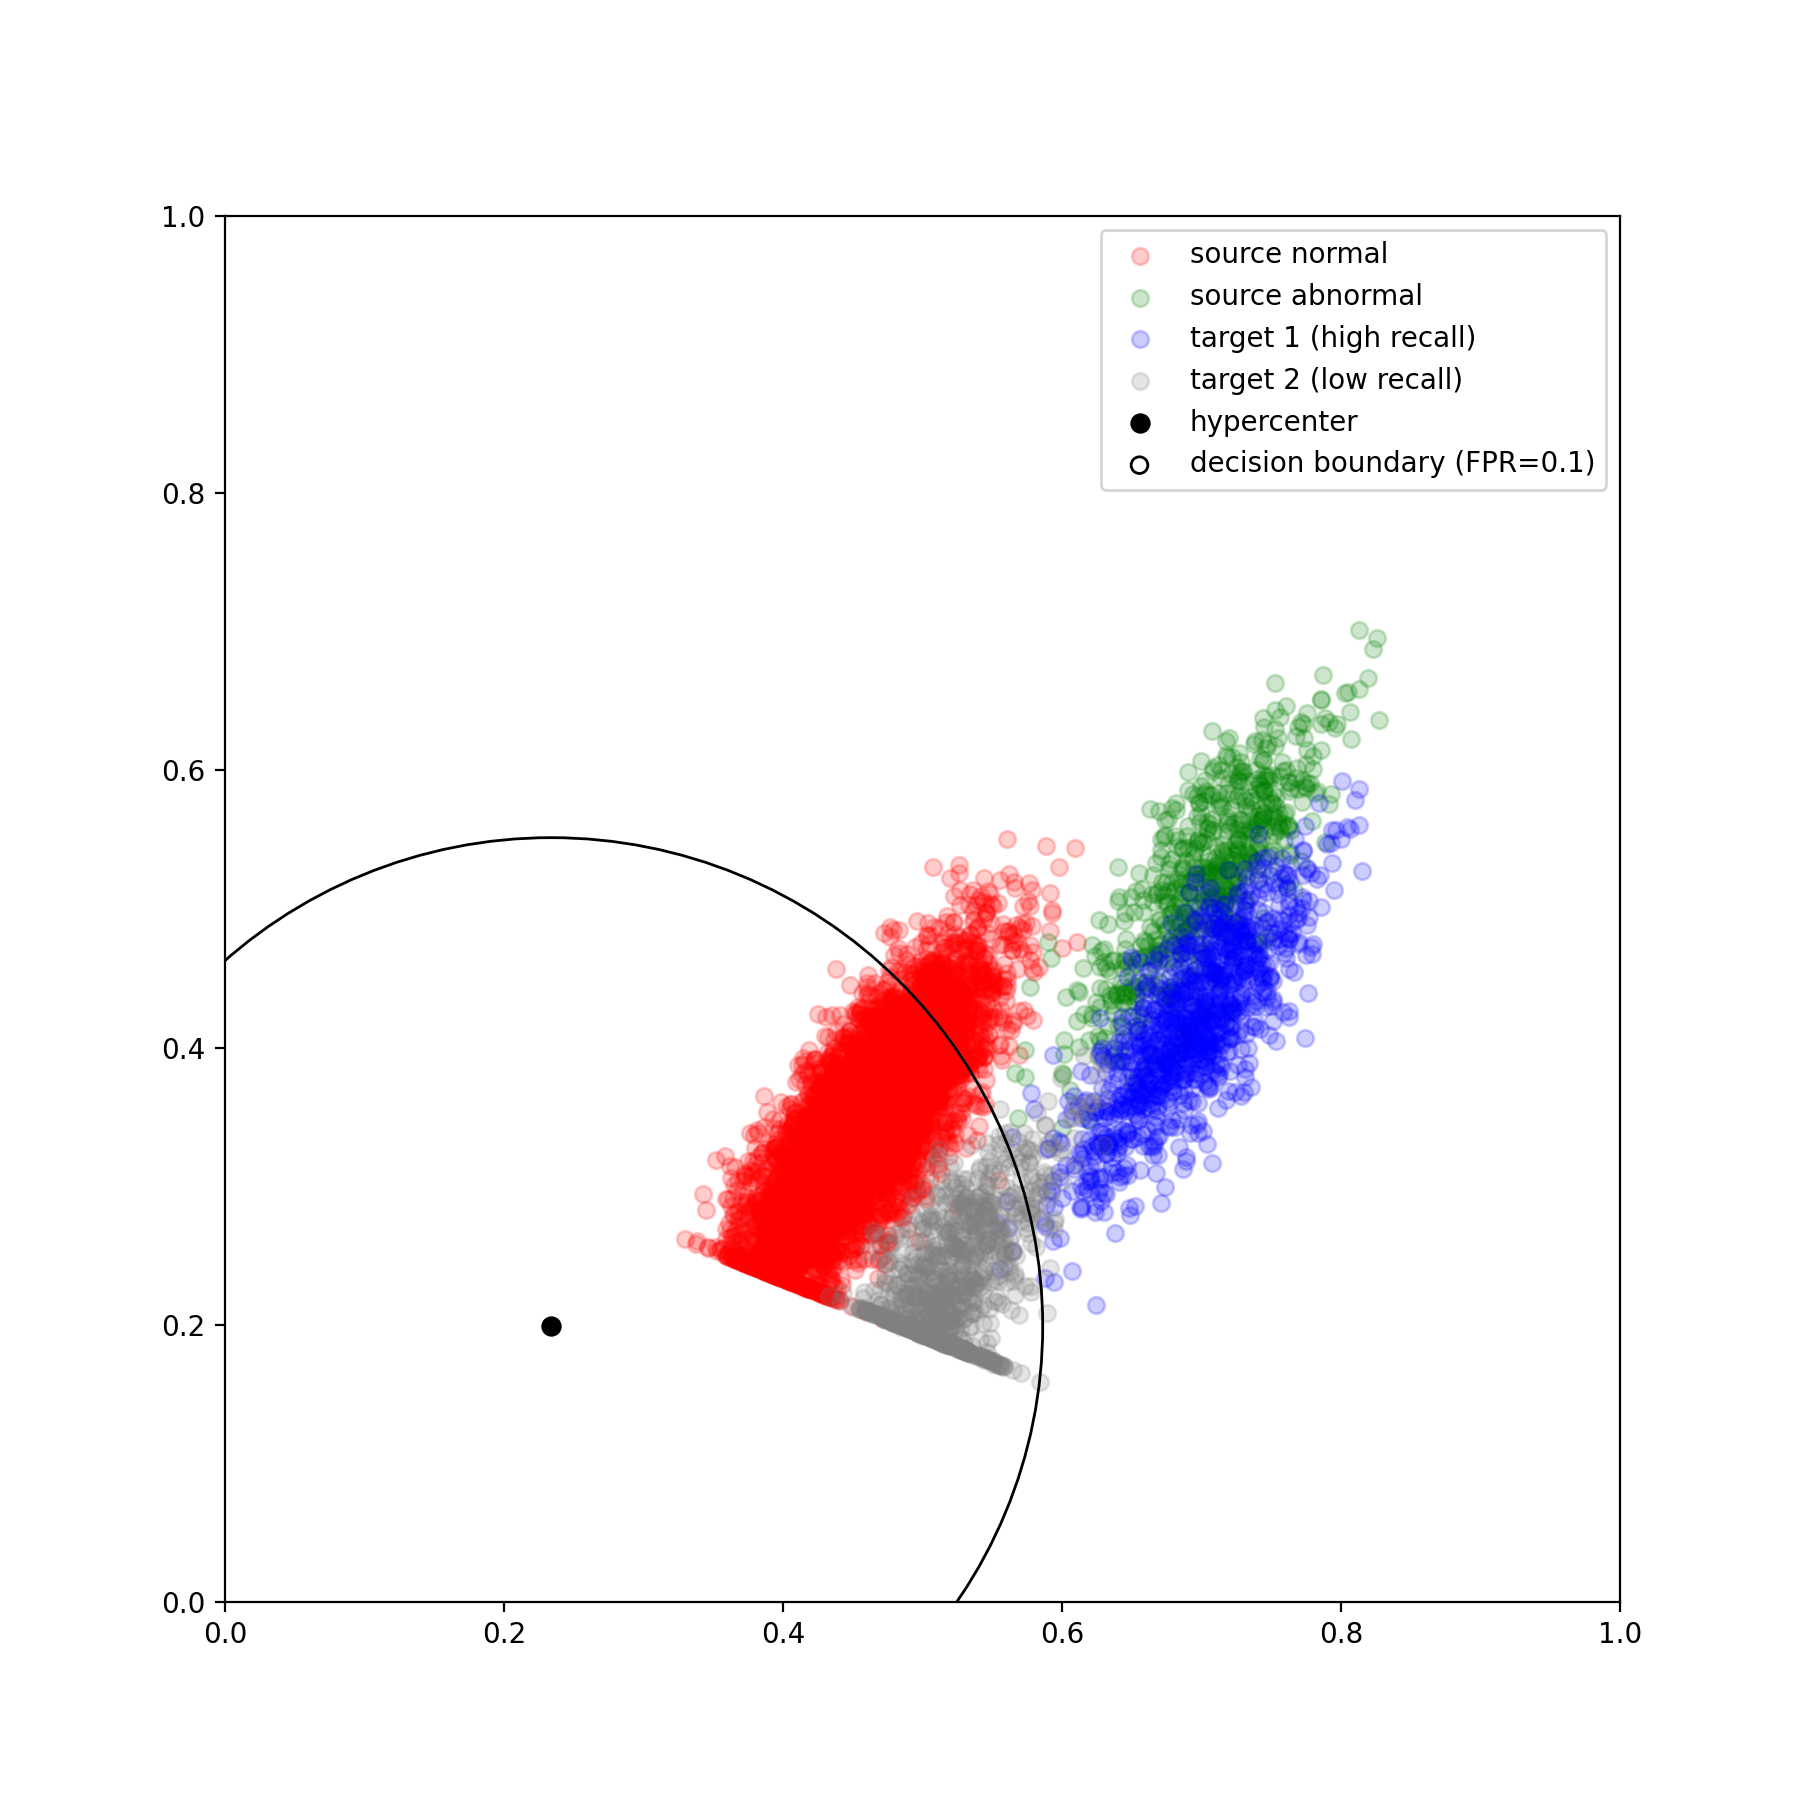

In [153]:
fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111)

ax.scatter(*latent_normal.T, color='red', alpha=0.2, label='source normal')
ax.scatter(*latent_abnormal.T, color='green', alpha=0.2, label='source abnormal')
ax.scatter(*latent_test_1.T, color='blue', alpha=0.2, label='target 1 (high recall)')
ax.scatter(*latent_test_2.T, color='gray', alpha=0.2, label='target 2 (low recall)')
ax.scatter(*encoder.c, s=40, color='black', label='hypercenter')

ax.scatter(-200,-200,marker='o', c='', edgecolors='black', label='decision boundary (FPR=0.1)')

boundary = plt.Circle(encoder.c, math.sqrt(cut_90), color='black', fill=False)
ax.add_artist(boundary)


ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
plt.legend()

# 5. Visualize for the Recall Trend

In [147]:
root_oc_ = root / 'one_class' / 'one_class_[1_-1_1]_[1_1_1]_[0.1]'

oc_d0i = pd.read_pickle(root_oc_ / 'df_d0i.pkl')
oc_d1i = pd.read_pickle(root_oc_ / 'df_d1i.pkl')

FileNotFoundError: [Errno 2] No such file or directory: '../report/one_class/one_class_[1_-1_1]_[1_1_1]_[0.1]/df_d0i.pkl'

<IPython.core.display.Javascript object>


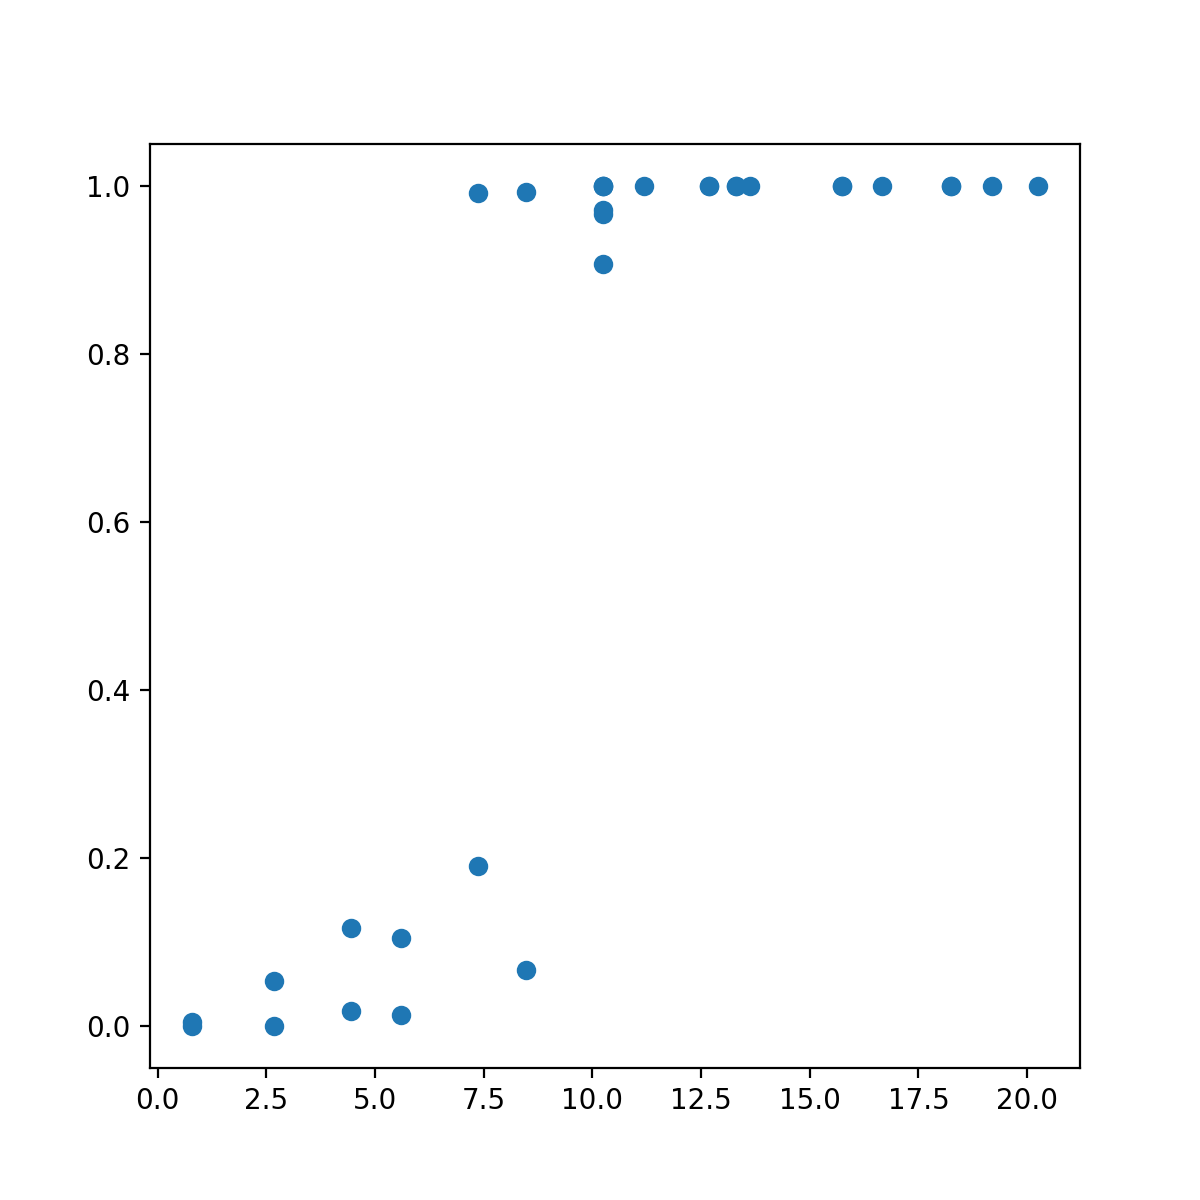

In [157]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
ax.scatter(x=oc_d0i['d0i'], y=oc_d0i['recall'])

In [154]:
oc_d0i

,d0i,d1i,recall,mu
0,0.797857,2.5,0.005000,"[0.9477721459070794, -1.363035787346584, 1.814..."
1,0.797857,2.5,0.000000,"[0.1857455931515376, -1.363035787346584, 0.944..."
2,2.675541,2.5,0.000000,"[-0.41452793176127223, -0.8936146945170809, 1...."
3,2.675541,2.5,0.053333,"[0.34749862099426954, -0.8936146945170809, -0...."
4,4.445306,2.5,0.018333,"[-1.0349554500507896, -0.45117355532045833, 0...."
5,4.445306,2.5,0.116667,"[0.9679261392837867, -0.45117355532045833, 3.0..."
6,5.598418,2.5,0.105000,"[-0.6307080762542079, -0.16289545142059048, -0..."
7,5.598418,2.5,0.013333,"[0.131318476501334, -0.16289545142059048, 3.03..."
8,7.368183,2.5,0.991667,"[0.7517459947908512, 0.2795456877760323, -1.38..."
9,7.368183,2.5,0.190000,"[-1.251135594543725, 0.2795456877760323, 1.814..."
